### ML : KNN model

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# 데이터 불러오기
# test data 사용
df = pd.read_csv("./data/test_dataset.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00070.0.wav,66149,0.327257,0.089326,0.102995,0.000962,2053.039265,175393.0681,2148.532118,68622.96847,...,63.861172,-13.859185,44.053471,2.938299,51.255123,-9.926486,58.735661,-2.246609,38.642353,blues
1,blues.00070.1.wav,66149,0.356214,0.091433,0.102495,0.001140,2289.782652,392561.3949,2218.779455,80153.74626,...,85.640213,-10.624115,81.322975,3.053966,53.951809,-9.995337,35.738594,-5.606273,67.594528,blues
2,blues.00070.2.wav,66149,0.314184,0.094665,0.113331,0.000868,2320.647543,481029.9734,2154.638135,90326.70166,...,43.957005,-12.798533,108.835838,4.505296,55.439808,-11.319338,65.511330,-3.274713,49.242832,blues
3,blues.00070.3.wav,66149,0.342166,0.094527,0.113219,0.001370,2310.365290,721766.3534,2119.048851,56215.37020,...,100.082313,-12.982813,58.553513,3.541630,68.233871,-6.851357,85.219940,-0.377668,138.687073,blues
4,blues.00070.4.wav,66149,0.300135,0.094798,0.113716,0.001045,2081.540213,227475.9871,2150.211727,46688.51282,...,85.380920,-11.630838,35.749752,5.821163,74.074341,-10.610699,43.119072,-2.559036,76.863861,blues


In [13]:
# Data set preprocessing
# Normalized, MinMax Scaler
import sklearn
from sklearn.model_selection import train_test_split
    
X = df.drop(columns=['length', 'filename','label', 'tempo']) 
y = df['label'] #장르명

scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(X)

X = pd.DataFrame(np_scaled, columns=X.columns)

X.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.333397,0.778117,0.244287,0.029486,0.316113,0.046090,0.472392,0.068218,0.457417,0.077051,...,0.553941,0.102598,0.283449,0.076497,0.415190,0.069947,0.308272,0.044035,0.585557,0.053207
1,0.379114,0.800279,0.243090,0.034960,0.364021,0.103929,0.496367,0.079881,0.486307,0.110690,...,0.574006,0.138330,0.349179,0.147418,0.417377,0.074283,0.306729,0.023764,0.526646,0.093365
2,0.312756,0.834281,0.269032,0.026601,0.370267,0.127491,0.474476,0.090172,0.472966,0.128119,...,0.482748,0.069943,0.304999,0.199772,0.444828,0.076675,0.277045,0.050008,0.567529,0.067910
3,0.356934,0.832821,0.268762,0.042014,0.368186,0.191606,0.462329,0.055667,0.471872,0.106731,...,0.513638,0.162024,0.301255,0.104089,0.426601,0.097245,0.377215,0.067381,0.618328,0.191972
4,0.290577,0.835678,0.269954,0.032024,0.321880,0.059962,0.472965,0.046030,0.462223,0.063651,...,0.553974,0.137904,0.328724,0.060696,0.469716,0.106635,0.292933,0.030269,0.580079,0.106222


In [14]:
# Data Split

X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2400, 56) (2400,)
(600, 56) (600,)


In [15]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k=1
clf=KNeighborsClassifier().fit(X_train, y_train)
print(clf)

yhat=clf.predict(X_test)
print('Train set Accuracy : ', metrics.accuracy_score(y_train, clf.predict(X_train)))
print('Test set Accuracy : ', metrics.accuracy_score(y_test, yhat))


KNeighborsClassifier()
Train set Accuracy :  0.9691666666666666
Test set Accuracy :  0.9516666666666667


In [16]:
Ks=10
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))

for n in range(1, Ks):
    clf = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = clf.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

print(mean_acc)

[0.96166667 0.95166667 0.96       0.95333333 0.95166667 0.94166667
 0.94       0.93333333 0.93166667]


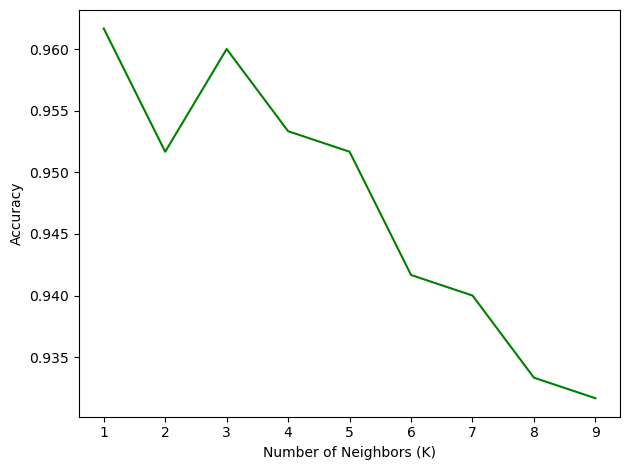

In [17]:
# KNN visualization
# 가장 정확도가 높은 k값 도출, k=1
plt.plot(range(1, Ks), mean_acc, 'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [18]:
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9616666666666667 with k= 1


In [19]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test, yhat)

array([[66,  0,  4,  1,  0,  0,  0,  0,  0,  1],
       [ 0, 66,  0,  0,  0,  1,  0,  0,  1,  1],
       [ 2,  0, 53,  0,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  1, 51,  1,  0,  0,  0,  0,  3],
       [ 0,  0,  1,  0, 53,  0,  0,  5,  0,  0],
       [ 0,  1,  1,  1,  0, 60,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  3,  0, 50,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  1,  0, 54,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  4, 52,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0,  0, 54]])

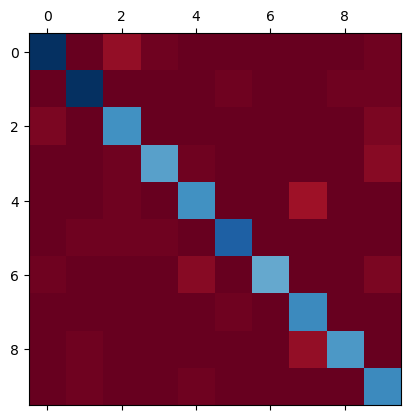

In [20]:
cmf = confusion_matrix(y_test, yhat)
plt.matshow(cmf, cmap=plt.cm.RdBu)
plt.show()